In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import cluster

# local imports
from dbscan import DBScan


In [35]:
n_samples = 100000
data, labels = datasets.make_circles(n_samples=n_samples,
                        factor=.5,
                        noise=.05)
df = pd.DataFrame(data = data, columns=['x', 'y'])
df['new'] = ''
for i in range(len(df)):
    df['new'][i] = (df['x'][i], df['y'][i])

In [26]:
model = DBScan(.1, 3)
model.fit(df['new'].tolist())
df['result'] = df['new'].apply(lambda x: model.predict(x))
df.head()

,x,y,new,result
0,-0.741119,0.566315,"(-0.741118830093057, 0.5663150603065145)",1
1,0.331501,0.327860,"(0.3315013682733348, 0.3278603943038132)",2
2,-0.982859,-0.255209,"(-0.9828586674189844, -0.2552092484775453)",0
3,-0.361497,-0.246612,"(-0.3614971038435338, -0.24661221682746426)",0
4,-0.487778,0.270709,"(-0.4877778868040453, 0.27070928843206715)",0


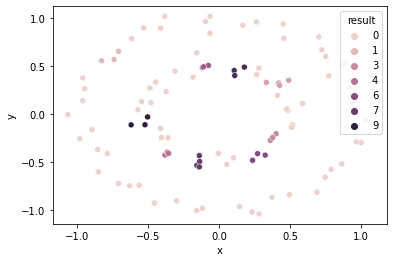

In [27]:
sns.scatterplot(data=df, x='x', y='y', hue='result');

In [36]:
clustering = cluster.DBSCAN(eps=.1, min_samples=3)
clustering.fit(df['new'].tolist())

DBSCAN(eps=0.1, min_samples=3)

In [37]:
df['sklearn'] = clustering.labels_

In [38]:
df['sklearn'].value_counts()

1    50000
0    50000
Name: sklearn, dtype: int64

In [31]:
df['result'].value_counts()

0    70
7     4
3     4
2     4
9     3
8     3
6     3
5     3
4     3
1     3
Name: result, dtype: int64